In [185]:
import pandas as pd

In [186]:
morph_data = pd.read_pickle("morph_data.pkl")
me_data = pd.read_pickle("me_data.pkl")
expr_data = pd.read_pickle("express_data.pkl")

### Method1: 构造中心向量对比相关性（Cluster Mean Matching）

In [188]:
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [189]:
cols_to_scale = morph_data.columns.difference(['Stems'])  
morph_data_z = morph_data.copy()
morph_data_z[cols_to_scale] = (morph_data[cols_to_scale] - morph_data[cols_to_scale].mean()) / morph_data[cols_to_scale].std()
scaler = MinMaxScaler()
morph_data_z[cols_to_scale] = scaler.fit_transform(morph_data_z[cols_to_scale])

me_data_z = me_data.copy()
me_data_z = (me_data - me_data.mean()) / me_data.std()
me_data_z = pd.DataFrame(MinMaxScaler().fit_transform(me_data_z), columns=me_data.columns, index=me_data.index)


expr_data_t = expr_data.T
expr_data_z = (expr_data_t - expr_data_t.mean()) / expr_data_t.std()
expr_data_z = pd.DataFrame(
    MinMaxScaler().fit_transform(expr_data_z),
    columns=expr_data_z.columns,
    index=expr_data_z.index
)

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [190]:
k = 10
morph_kmeans = KMeans(n_clusters=k, random_state=42).fit(morph_data_z)
morph_centers = pd.DataFrame([
    morph_data_z[morph_kmeans.labels_ == i].mean().values for i in range(k)
], columns=morph_data.columns)
morph_centers

,Stems,Bifurcations,Branches,Tips,OverallWidth,OverallHeight,OverallDepth,Length,Volume,MaxEuclideanDistance,...,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension,pc11,pc12,pc13,pca_vr1,pca_vr2,pca_vr3
0,1.0,0.003772,0.003690,0.003622,0.238865,0.352157,0.686176,0.005626,0.002441,0.390400,...,0.269242,0.467375,0.517780,0.137149,0.635965,0.332590,0.943192,0.661588,0.271924,0.279097
1,1.0,0.004112,0.004037,0.003978,0.181962,0.171569,0.837275,0.004277,0.001924,0.416611,...,0.295028,0.280483,0.386767,0.139200,0.287392,0.317859,0.975610,0.856857,0.147515,0.063567
2,1.0,0.003202,0.003125,0.003062,0.150706,0.345023,0.644627,0.005448,0.002786,0.288241,...,0.274113,0.479658,0.521048,0.118947,0.426384,0.292570,0.978294,0.552802,0.337503,0.407221
3,1.0,0.038299,0.037841,0.037432,0.380815,0.329598,0.288744,0.037739,0.028059,0.322091,...,0.306338,0.510572,0.649764,0.296203,0.865161,0.521307,0.316705,0.647694,0.289406,0.275807
4,1.0,0.003077,0.003002,0.002940,0.187250,0.348101,0.751056,0.004997,0.002467,0.402746,...,0.268082,0.473100,0.519672,0.162643,0.251757,0.365053,0.970236,0.675920,0.272917,0.241429
5,1.0,0.003520,0.003458,0.003410,0.235902,0.190210,0.786113,0.004195,0.002145,0.408854,...,0.287326,0.275004,0.382374,0.139656,0.613507,0.306955,0.950545,0.837612,0.169352,0.064141
6,1.0,0.001646,0.001588,0.001544,0.214745,0.274025,0.675462,0.004609,0.003735,0.341743,...,0.271385,0.592679,0.519789,0.158373,0.607845,0.335354,0.947823,0.629815,0.273559,0.354328
7,1.0,0.005690,0.005623,0.005571,0.240230,0.170719,0.801071,0.006247,0.004276,0.432322,...,0.274952,0.476307,0.564622,0.143143,0.620838,0.314418,0.949361,0.854568,0.153150,0.057079
8,1.0,0.004073,0.003991,0.003924,0.186243,0.237318,0.713333,0.004717,0.002375,0.295001,...,0.283687,0.461700,0.539793,0.128274,0.470010,0.281196,0.971501,0.761007,0.243398,0.094223
9,1.0,0.006565,0.006478,0.006407,0.182276,0.143819,0.862036,0.006689,0.004073,0.440328,...,0.294065,0.475846,0.573842,0.153922,0.279138,0.331601,0.976376,0.875971,0.130543,0.052816


In [191]:
me_kmeans = KMeans(n_clusters=k, random_state=42).fit(me_data_z)
me_centers = pd.DataFrame([
    me_data_z[me_kmeans.labels_ == i].mean().values for i in range(k)
], columns=me_data.columns)
me_centers

,Stems_me,Bifurcations_me,Branches_me,Tips_me,OverallWidth_me,OverallHeight_me,OverallDepth_me,Length_me,Volume_me,MaxEuclideanDistance_me,...,AverageParent-daughterRatio_me,AverageBifurcationAngleLocal_me,AverageBifurcationAngleRemote_me,HausdorffDimension_me,pc11_me,pc12_me,pc13_me,pca_vr1_me,pca_vr2_me,pca_vr3_me
0,0.000000,0.002721,0.002647,0.002582,0.209597,0.289362,0.702522,0.002925,0.001904,0.420800,...,0.345248,0.548922,0.445345,0.100894,0.572321,0.246799,0.937497,0.711153,0.284384,0.226625
1,0.000000,0.002899,0.002818,0.002746,0.149866,0.295396,0.788911,0.002662,0.001633,0.460041,...,0.336624,0.525340,0.455672,0.119869,0.126994,0.277518,0.964601,0.755483,0.273016,0.155869
2,0.000000,0.002764,0.002702,0.002650,0.219230,0.139121,0.813103,0.001993,0.001869,0.485294,...,0.358872,0.424053,0.371896,0.105069,0.568094,0.237400,0.944012,0.891178,0.162192,0.066228
3,0.000000,0.004590,0.004520,0.004458,0.138306,0.106274,0.886597,0.003324,0.002787,0.504628,...,0.395695,0.410085,0.363773,0.119353,0.161111,0.258229,0.973918,0.926990,0.125796,0.054506
4,0.000000,0.002001,0.001935,0.001878,0.108740,0.290160,0.620949,0.002899,0.002621,0.278606,...,0.346377,0.592461,0.428473,0.077421,0.406371,0.200267,0.966026,0.540120,0.377571,0.417250
5,0.010388,0.036742,0.036289,0.035879,0.375358,0.291415,0.274048,0.036350,0.027927,0.318948,...,0.427316,0.592149,0.621251,0.260386,0.813344,0.463548,0.331622,0.618560,0.353755,0.298231
6,0.000000,0.002612,0.002544,0.002484,0.067836,0.327018,0.723611,0.002848,0.001737,0.358911,...,0.336395,0.510977,0.432034,0.109593,0.250809,0.253264,0.987129,0.612567,0.361904,0.296757
7,0.000000,0.001254,0.001196,0.001147,0.198219,0.232242,0.696520,0.002477,0.003149,0.394376,...,0.329152,0.648664,0.404434,0.124995,0.583440,0.254602,0.939892,0.665591,0.289534,0.310259
8,0.000000,0.002835,0.002763,0.002699,0.136707,0.201725,0.746440,0.002144,0.001784,0.333892,...,0.377522,0.376141,0.311544,0.085766,0.349274,0.203766,0.967987,0.792659,0.259695,0.102858
9,0.000000,0.001655,0.001587,0.001527,0.167519,0.258882,0.752317,0.002525,0.002887,0.460198,...,0.364411,0.595975,0.407233,0.140440,0.117737,0.276869,0.961612,0.706434,0.271159,0.258260


In [192]:
expr_data_z_clean = expr_data_z.dropna(axis=1, how='any')

rna_kmeans = KMeans(n_clusters=k, random_state=42).fit(expr_data_z_clean)
rna_centers = pd.DataFrame([
    expr_data_z_clean[rna_kmeans.labels_ == i].mean().values for i in range(k)
], columns=expr_data_z_clean.columns)
rna_centers

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,FBgn0000008,FBgn0000014,FBgn0000015,FBgn0000017,FBgn0000018,FBgn0000022,FBgn0000024,FBgn0000028,FBgn0000032,FBgn0000036,...,FBgn0267652,FBgn0267689,FBgn0267690,FBgn0267698,FBgn0267726,FBgn0267728,FBgn0267790,FBgn0267791,FBgn0267792,FBgn0267795
0,0.007825,0.000000,0.044198,0.003557,0.001473,0.0,0.038498,0.000000,0.001980,0.000232,...,0.115288,0.000000,0.000000,0.021921,0.001004,0.011290,0.016809,0.004211,0.001177,0.001767
1,0.735821,0.006329,0.002336,0.803245,0.436869,0.0,0.769032,0.769414,0.421488,0.723946,...,0.000000,0.062500,0.000000,0.818632,0.000000,0.841935,0.580954,0.859134,0.277575,0.781338
2,0.216426,0.000000,0.023364,0.119621,0.737374,0.0,0.343807,0.553090,0.787190,0.347112,...,0.052632,0.386364,0.000000,0.299662,0.313253,0.387097,0.769231,0.665627,0.837739,0.580270
3,0.713751,1.000000,0.175234,0.778632,0.454545,0.0,0.622067,0.668780,0.386364,0.662821,...,0.000000,0.522727,0.000000,0.778879,1.000000,0.651613,0.562311,0.794754,0.338195,0.839460
4,0.007691,0.009494,0.018107,0.000000,0.018939,0.0,0.248131,0.000000,0.054752,0.000000,...,0.503759,0.000000,0.000000,0.118656,0.000000,0.080645,0.156785,0.015545,0.001823,0.001492
5,0.376003,0.012658,0.014019,0.227259,0.828283,0.0,0.454538,0.458003,1.000000,0.395400,...,0.203008,0.431818,0.000000,0.408652,0.409639,0.961290,1.000000,0.849413,1.000000,0.625825
6,0.019472,0.014467,0.034713,0.000000,0.007215,0.0,0.082219,0.000000,0.017414,0.000000,...,0.448980,0.000000,0.142857,0.089968,0.058520,0.082028,0.168674,0.015302,0.002605,0.001077
7,0.914727,0.018987,0.009346,0.993060,0.426768,0.0,0.927253,0.866878,0.555785,0.918399,...,0.000000,0.045455,0.000000,0.948284,0.000000,0.806452,0.614545,0.992938,0.310392,0.976751
8,0.001605,0.000000,0.000000,0.004893,0.000000,1.0,0.083048,0.000000,0.000000,0.000000,...,0.270677,0.000000,0.000000,0.007975,0.000000,0.025806,0.005375,0.016875,0.000000,0.000314
9,0.271001,0.000000,0.004673,0.141687,1.000000,0.0,0.303476,0.312203,0.791322,0.246485,...,0.097744,1.000000,0.000000,0.269454,0.120482,0.387097,0.686597,0.571167,0.711942,0.442350


In [193]:
gene_scores = {}
for gene in rna_centers.columns:
    gene_vector = rna_centers[gene].values
    best_r = -1
    best_p = None
    for feat in morph_centers.columns:
        feat_vector = morph_centers[feat].values
        r, p = pearsonr(gene_vector, feat_vector)
        if abs(r) > best_r:
            best_r = abs(r)
            best_p = p
    gene_scores[gene] = (best_r, best_p)  # (correlation, p-value)

C:\Windows\Temp\ipykernel_34912\1261524514.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = pearsonr(gene_vector, feat_vector)


In [194]:
top_genes = sorted(gene_scores.items(), key=lambda x: x[1][0], reverse=True)

In [195]:
import csv

filtered_genes = []
for gene, (corr, pval) in top_genes:
    if corr > 0:  
        filtered_genes.append((gene, corr, pval))

with open("correlated_genes_morph_rna.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Gene", "Correlation", "PValue"])
    writer.writerows(filtered_genes)

In [196]:
gene_scores2 = {}
for gene in rna_centers.columns:
    gene_vector = rna_centers[gene].values
    best_r = -1
    best_p = None
    for feat in me_centers.columns:
        feat_vector = me_centers[feat].values
        r, p = pearsonr(gene_vector, feat_vector)
        if abs(r) > best_r:
            best_r = abs(r)
            best_p = p
    gene_scores2[gene] = (best_r, best_p)  # (correlation, p-value)

top_genes2 = sorted(gene_scores2.items(), key=lambda x: x[1][0], reverse=True)

In [197]:
import csv

filtered_genes = []
for gene, (corr, pval) in top_genes2:
    if corr > 0:  
        filtered_genes.append((gene, corr, pval))

with open("correlated_genes_me_rna.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Gene", "Correlation", "PValue"])
    writer.writerows(filtered_genes)

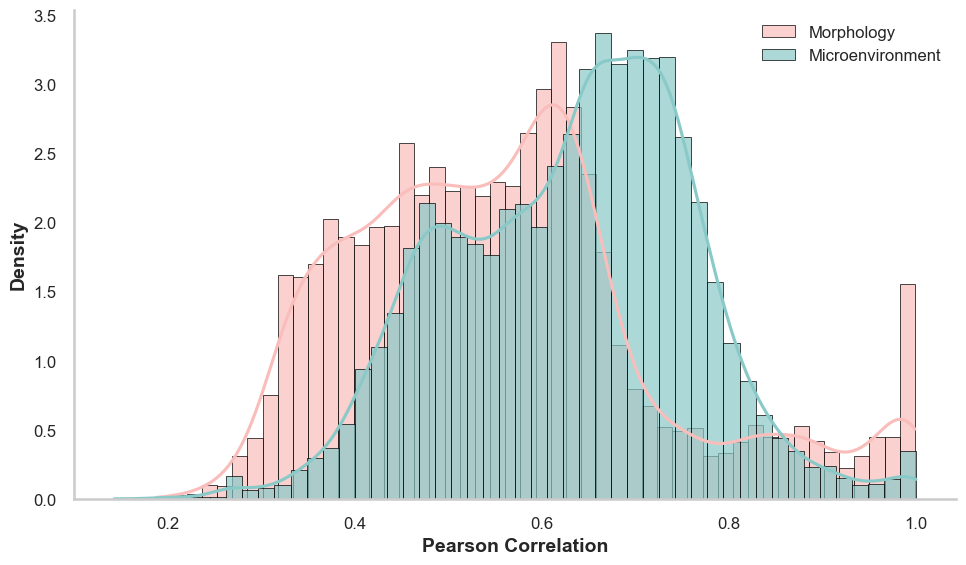

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

correlation_values = pd.read_csv("correlated_genes_morph_rna.csv", usecols=[1]).iloc[:, 0]
correlation_values2 = pd.read_csv("correlated_genes_me_rna.csv", usecols=[1]).iloc[:, 0]
sns.set(style="whitegrid", context="talk", font="Arial")

plt.figure(figsize=(10, 6))
mpl.rcParams['svg.fonttype'] = 'none'

# Plot Morph group
sns.histplot(correlation_values, bins=50, kde=True, stat="density",
             color='#F9BEBB', label='Morphology', alpha=0.7, edgecolor='black', linewidth=0.5)

# Plot MicroEnv group
sns.histplot(correlation_values2, bins=50, kde=True, stat="density",
             color='#89C9C8', label='Microenvironment', alpha=0.7, edgecolor='black', linewidth=0.5)

plt.xlabel("Pearson Correlation", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(frameon=False, fontsize=12)
plt.grid(False)

sns.despine()

# plt.title("Comparison of Gene Correlation Distributions", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig("distribution.svg", format="svg")
plt.show()

In [202]:
top_gene_names = [
    "FBgn0030661",
    "FBgn0038845",
    "FBgn0040628",
    "FBgn0039838",
    "FBgn0039007",
    "FBgn0030348",
    "FBgn0030073",
    "FBgn0039656",
    "FBgn0035476",
    "FBgn0031935",
    "FBgn0031939",
    "FBgn0030361",
    "FBgn0050487",
    "FBgn0036787",
    "FBgn0035969",
    "FBgn0004780",
    "FBgn0022700",
    "FBgn0035398",
    "FBgn0034582",
    "FBgn0062413",
    "FBgn0010383",
    "FBgn0000551",
    "FBgn0001145",
    "FBgn0010041",
    "FBgn0020639",
    "FBgn0035435",
    "FBgn0036893",
    "FBgn0037535",
    "FBgn0050381",
    "FBgn0033868",
    "FBgn0035078",
    "FBgn0035187",
    "FBgn0033096",
    "FBgn0000527",
    "FBgn0001311",
    "FBgn0002778",
    "FBgn0031097",
    "FBgn0015765",
    "FBgn0005626",
    "FBgn0034730",
    "FBgn0030795",
    "FBgn0037203",
    "FBgn0003495",
    "FBgn0086367",
    "FBgn0014396"
]

C:\Windows\Temp\ipykernel_34912\3126913479.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


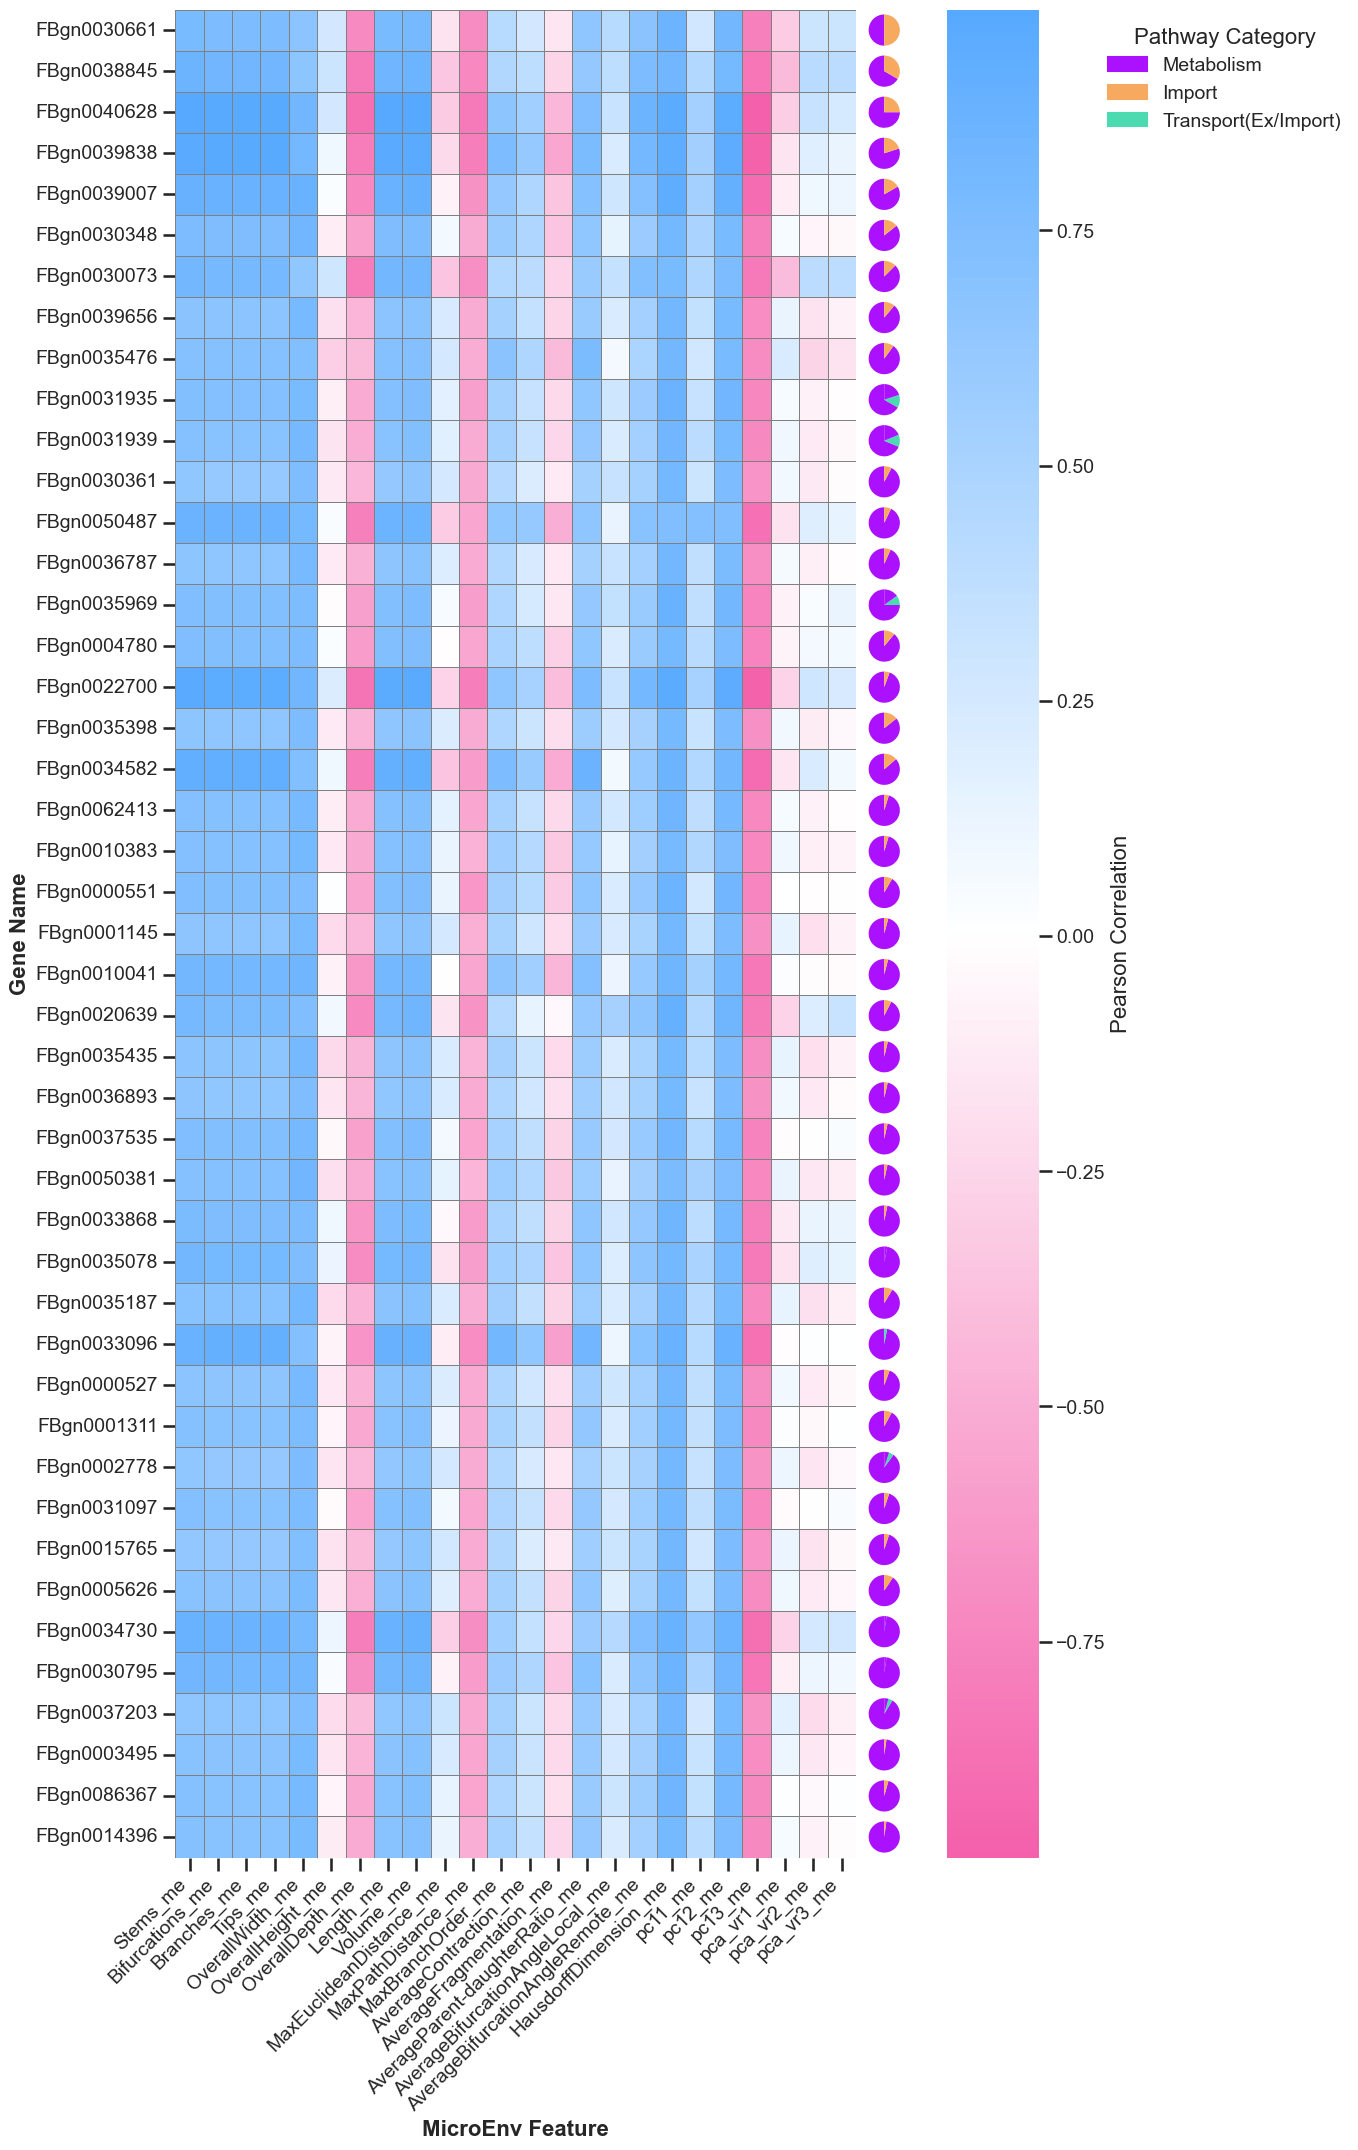

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

class_df = pd.read_csv("filtered_gene_cat_matrix.csv")
#class_df["Gene"] = "Dmel_" + class_df["Gene"].astype(str)
class_df.set_index("Gene", inplace=True)

corr_matrix = pd.DataFrame(index=rna_centers.columns, columns=me_centers.columns)
for gene in rna_centers.columns:
    for feat in me_centers.columns:
        r, _ = pearsonr(rna_centers[gene].values, me_centers[feat].values)
        corr_matrix.loc[gene, feat] = r
corr_matrix = corr_matrix.astype(float)

top_gene_names = [g for g in top_gene_names if g in corr_matrix.index and g in class_df.index]
heatmap_data = corr_matrix.loc[top_gene_names]
class_df = class_df.loc[top_gene_names]

fig = plt.figure(figsize=(15, 24))
mpl.rcParams['svg.fonttype'] = 'none'
gs = fig.add_gridspec(1, 2, width_ratios=[8, 2], wspace=0.05)

font_label = {'fontsize': 16, 'fontweight': 'bold', 'family': 'Arial'}
font_ticks = {'fontsize': 12, 'family': 'Arial'}

######################################################################

# Heatmap
ax_heatmap = fig.add_subplot(gs[0])
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#F460AB", "#FFFFFF", "#57A9FF"])
yticklabels = [name.replace("Dmel_", "") for name in top_gene_names]
sns.heatmap(heatmap_data, cmap=custom_cmap, center=0, ax=ax_heatmap,
            cbar_kws={'label': 'Pearson Correlation', 'pad': 0.1}, linewidths=0.5, linecolor='gray',
            yticklabels=yticklabels)
ax_heatmap.set_ylabel("")
#ax_heatmap.set_xlabel("Microenvironment Features")
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right')
ax_heatmap.tick_params(axis='x', labelsize=14, bottom=True, top=False)
ax_heatmap.tick_params(axis='y', labelsize=14, left=True, right=False)
cbar = ax_heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Pearson Correlation', fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.xlabel("MicroEnv Feature", fontsize=16, fontweight='bold')
plt.ylabel("Gene Name", fontsize=16, fontweight='bold')

# pie_chart
ax_pie = fig.add_subplot(gs[1])
ax_pie.set_xlim(0, 1)
ax_pie.set_ylim(0, len(top_gene_names))
ax_pie.invert_yaxis()
ax_pie.axis('off')  

pie_labels = ['Metabolism', 'Import', 'Transport(Ex/Import)']
pie_colors = ['#AB11FF', '#F7AA5F', '#4CDBB0']

for i, gene in enumerate(top_gene_names):
    proportions = class_df.loc[gene].values
    if proportions.sum() == 0:
        continue
    proportions = proportions / proportions.sum()

    inset_ax = inset_axes(ax_pie, width="95%", height="95%",
                          bbox_to_anchor=(-1.5, i, 1, 1),
                          bbox_transform=ax_pie.transData,
                          loc='center', borderpad=0)
    inset_ax.pie(proportions, colors=pie_colors, startangle=90, radius=1, wedgeprops={'edgecolor': 'none'})
    inset_ax.set_aspect('equal')
    inset_ax.axis('off')
legend_elements = [mpatches.Patch(color=col, label=lab) for col, lab in zip(pie_colors, pie_labels)]
ax_pie.legend(handles=legend_elements,
              loc='upper center',  
              bbox_to_anchor=(0.5, 1),  
              fontsize=14, ncol=1, frameon=False,
             title='Pathway Category', title_fontsize=16 )

plt.tight_layout()
plt.savefig("heatmap.svg", format="svg")
plt.show()

C:\Windows\Temp\ipykernel_34912\225435168.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(rna_centers[gene].values, morph_centers[feat].values)


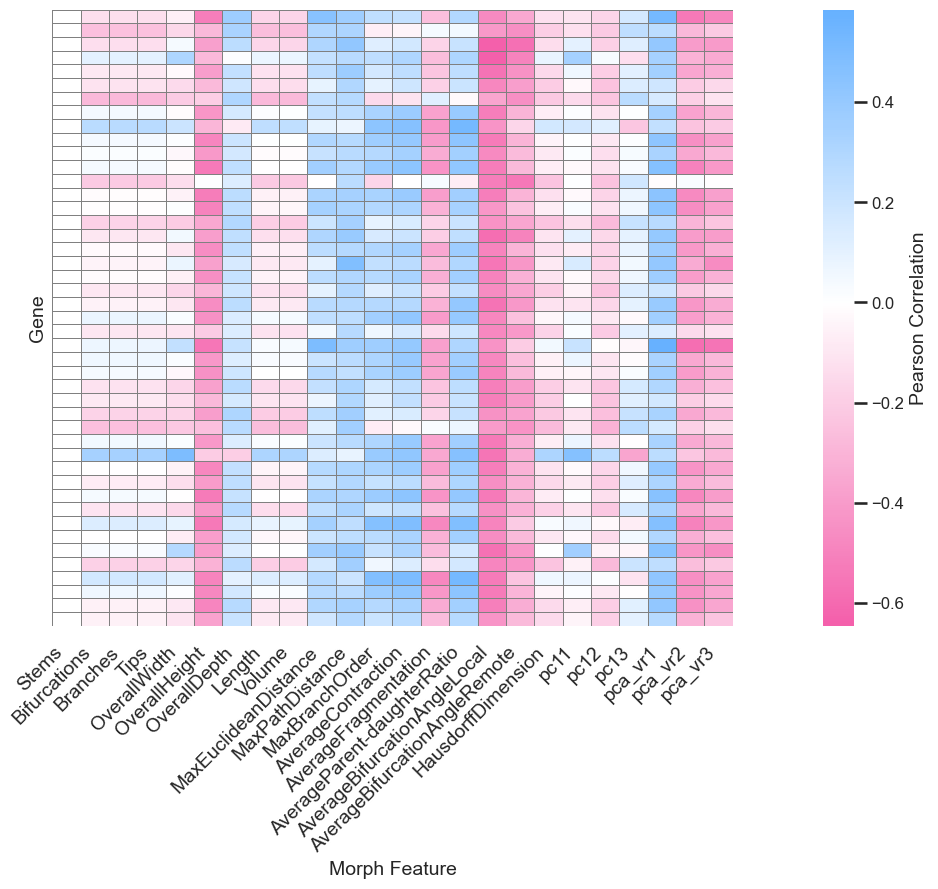

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap


corr_matrix = pd.DataFrame(index=rna_centers.columns, columns=morph_centers.columns)
for gene in rna_centers.columns:
    for feat in morph_centers.columns:
        r, _ = pearsonr(rna_centers[gene].values, morph_centers[feat].values)
        corr_matrix.loc[gene, feat] = r
corr_matrix = corr_matrix.astype(float)

heatmap_data = corr_matrix.loc[top_gene_names]

fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[8, 2], wspace=0.05)

font_label = {'fontsize': 16, 'fontweight': 'bold', 'family': 'Arial'}
font_ticks = {'fontsize': 12, 'family': 'Arial'}
###############################################################
# Heatmap
ax_heatmap = fig.add_subplot(gs[0])
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#F460AB", "#FFFFFF", "#57A9FF"])
yticklabels = [name.replace("Dmel_", "") for name in top_gene_names]
sns.heatmap(heatmap_data, cmap=custom_cmap, center=0, ax=ax_heatmap,
            cbar_kws={'label': 'Pearson Correlation', 'pad': 0.1}, linewidths=0.5, linecolor='gray',
            yticklabels=False)
ax_heatmap.set_ylabel("")
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right')
ax_heatmap.tick_params(axis='x', labelsize=14)
#ax_heatmap.tick_params(axis='y', labelsize=14)
cbar = ax_heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Pearson Correlation', fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.ylabel("Gene", fontsize=14)
plt.xlabel("Morph Feature", fontsize=14)
plt.savefig("heatmap_morph_rna.svg", format="svg")

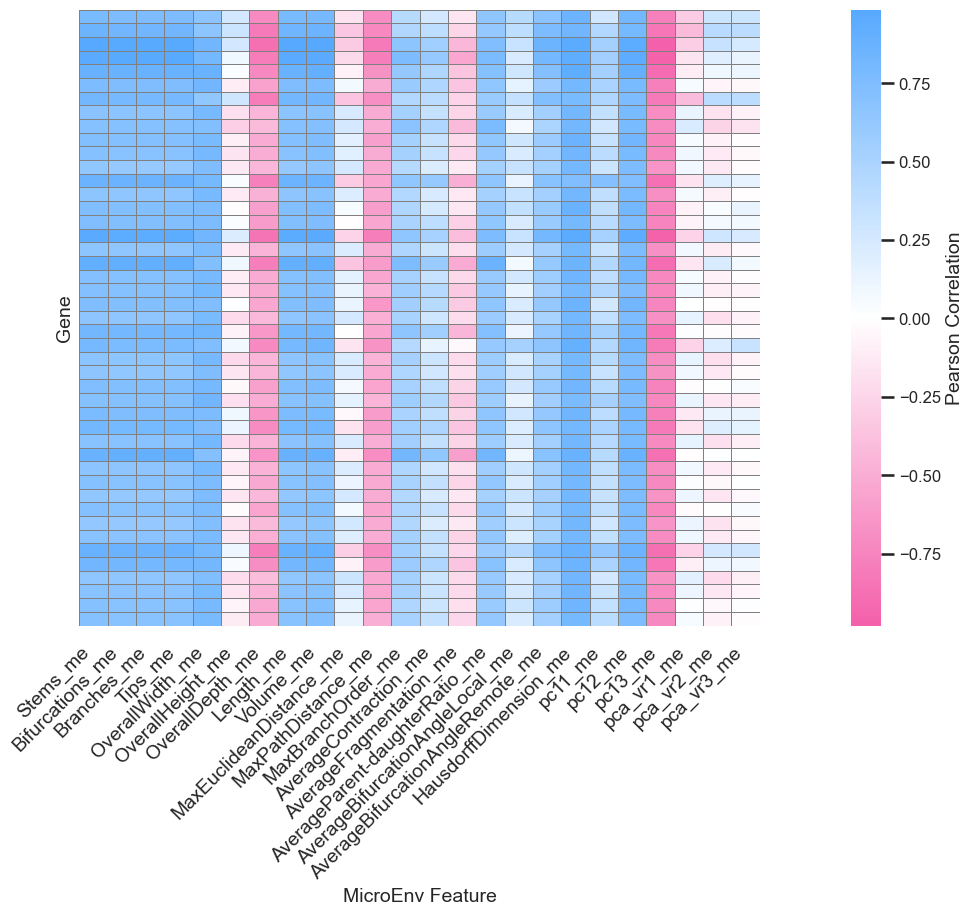

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap


corr_matrix = pd.DataFrame(index=rna_centers.columns, columns=me_centers.columns)
for gene in rna_centers.columns:
    for feat in me_centers.columns:
        r, _ = pearsonr(rna_centers[gene].values, me_centers[feat].values)
        corr_matrix.loc[gene, feat] = r
corr_matrix = corr_matrix.astype(float)

heatmap_data = corr_matrix.loc[top_gene_names]

fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[8, 2], wspace=0.05)

font_label = {'fontsize': 16, 'fontweight': 'bold', 'family': 'Arial'}
font_ticks = {'fontsize': 12, 'family': 'Arial'}
###############################################################
# Heatmap
ax_heatmap = fig.add_subplot(gs[0])
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#F460AB", "#FFFFFF", "#57A9FF"])
yticklabels = [name.replace("Dmel_", "") for name in top_gene_names]
sns.heatmap(heatmap_data, cmap=custom_cmap, center=0, ax=ax_heatmap,
            cbar_kws={'label': 'Pearson Correlation', 'pad': 0.1}, linewidths=0.5, linecolor='gray',
            yticklabels=False)
ax_heatmap.set_ylabel("")
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right')
ax_heatmap.tick_params(axis='x', labelsize=14)
#ax_heatmap.tick_params(axis='y', labelsize=14)
cbar = ax_heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Pearson Correlation', fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.ylabel("Gene", fontsize=14)
plt.xlabel("MicroEnv Feature", fontsize=14)
plt.savefig("heatmap_me_rna.svg", format="svg")

In [235]:
highlighted = df_corr.loc[highlight]

positive_corr = highlighted[highlighted['diff'] > 0]
negative_corr = highlighted[highlighted['diff'] < 0]

positive_corr.to_csv("highlighted_genes_positive_corr.csv")
negative_corr.to_csv("highlighted_genes_negative_corr.csv")

In [246]:
import pandas as pd
df1 = pd.read_csv("highlighted_genes_positive_corr.csv", index_col=0)
gene_list = df1.index.tolist()
with open("positive_genes.txt", "w") as f1:
    for gene in gene_list:
        f1.write(f"{gene}\n")

df2 = pd.read_csv("highlighted_genes_negative_corr.csv", index_col=0)
gene_list = df1.index.tolist()
with open("negative_genes.txt", "w") as f2:
    for gene in gene_list:
        f2.write(f"{gene}\n")

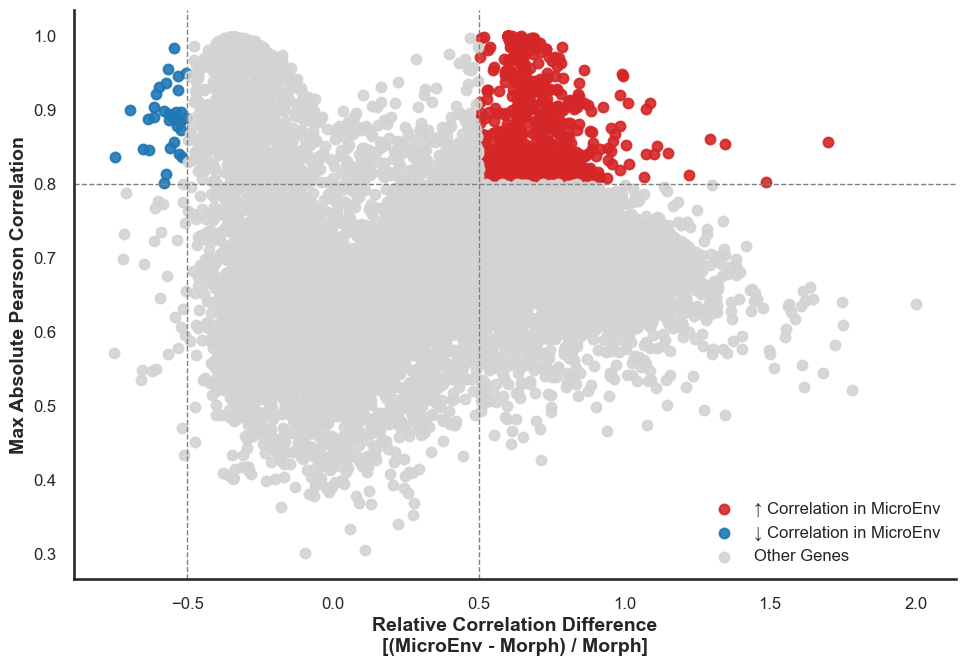

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style="white", context="talk", font="Arial")

morph_corr = {gene: corr_p[0] for gene, corr_p in gene_scores.items()}
me_corr = {gene: corr_p[0] for gene, corr_p in gene_scores2.items()}

df_corr = pd.DataFrame({
    'Morph_corr': pd.Series(morph_corr),
    'ME_corr': pd.Series(me_corr)
}).dropna()

df_corr['diff'] = (df_corr['ME_corr'] - df_corr['Morph_corr']) / df_corr['Morph_corr']
df_corr['max_abs_corr'] = df_corr[['Morph_corr', 'ME_corr']].abs().max(axis=1)

up = (df_corr['diff'] > 0.5) & (df_corr['max_abs_corr'] > 0.8)
down = (df_corr['diff'] < -0.5) & (df_corr['max_abs_corr'] > 0.8)
neutral = ~(up | down)

plt.figure(figsize=(10, 7))
mpl.rcParams['svg.fonttype'] = 'none'

plt.scatter(df_corr.loc[up, 'diff'], df_corr.loc[up, 'max_abs_corr'], 
            c='#d62728', alpha=0.9, label='↑ Correlation in MicroEnv', s=50)

plt.scatter(df_corr.loc[down, 'diff'], df_corr.loc[down, 'max_abs_corr'], 
            c='#1f77b4', alpha=0.9, label='↓ Correlation in MicroEnv', s=50)

plt.scatter(df_corr.loc[neutral, 'diff'], df_corr.loc[neutral, 'max_abs_corr'], 
            c='lightgrey', alpha=0.9, label='Other Genes', s=50)

#plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0.5, color='grey', linestyle='--', linewidth=1)
plt.axvline(-0.5, color='grey', linestyle='--', linewidth=1)
plt.axhline(0.8, color='grey', linestyle='--', linewidth=1)


plt.xlabel('Relative Correlation Difference\n[(MicroEnv - Morph) / Morph]', fontsize=14, fontweight='bold')
plt.ylabel('Max Absolute Pearson Correlation', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=False, fontsize=12, loc='lower right')

sns.despine()

plt.tight_layout()
plt.savefig("volcano.tiff", format="tif", dpi=300)
plt.show()

In [200]:
df_corr.loc[up].to_csv("highlighted_genes_positive_corr.csv")
df_corr.loc[down].to_csv("highlighted_genes_negative_corr.csv")

In [201]:
import pandas as pd
df1 = pd.read_csv("highlighted_genes_positive_corr.csv", index_col=0)
gene_list = df1.index.tolist()
with open("positive_genes.txt", "w") as f1:
    for gene in gene_list:
        f1.write(f"{gene}\n")

df2 = pd.read_csv("highlighted_genes_negative_corr.csv", index_col=0)
gene_list = df2.index.tolist()
with open("negative_genes.txt", "w") as f2:
    for gene in gene_list:
        f2.write(f"{gene}\n")